# ATSC 507 Assignment VIII - Due March 3

In [1]:
__author__ = 'Yingkai (Kyle) Sha'
__email__  = 'yingkai@eos.ubc.ca' 

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from __future__ import division
% matplotlib inline

#Content
1. [**Known conditions**](#Known-conditions)
1. [**Numerical scheme**](#Numerical-scheme)
1. [**Results on the first timestep**](#Results-on-the-first-timestep)
1. [**Comparisons for 15 timesteps**](#Comparisons-for-15-timesteps)

# Known conditions

I repeat the problem to make it clear:

> Based on HW8 content, we are tring to solve $T(t)$ in:
$$
\frac{\partial T}{\partial t} = 3-2.25t-\frac{1.5T}{2-1.5t}
$$
And mean while we already know the analytical solution is:
$$
T = - 2.25t^2 + \left( 6 - 1.5T_0 \right)t + 2T_0 - 4
$$
with $t=m\Delta t$ and initial condition $T_0$.

> The problem requires to start with 0 dimension case $T_0 = 2^\circ C$ for 1 time step ($m=1$) in `Euler forward` and the family of `Runge-Kutta` methods. 

In [3]:
def analytical(t, T0):
    return (1.5*t+T0-2)*(2-1.5*t)
def slop_T(t, Tm):
    return 1.5*(2-1.5*t-(Tm/(2-1.5*t)))

# Numerical scheme

Here are 4 functions for testing:

  * Euler_forward: `Euler forward` temporal discretization
  * RK2: `2nd order Runge-Kutta`
  * RK3: `3rd order Runge-Kutta`
  * RK4: `4th order Runge-Kutta`

In [4]:
# delta_t: step-length
# m: number of steps
# T0: Tref in Roland's equation
# Euler forward
def Euler_forward(delta_t, m, T0):
    time_steps = np.arange(0, (m+1)*delta_t, delta_t)
    T = np.empty(m); Tm = T0; delta_t = np.array(delta_t)
    for i in range(m):
        t = time_steps[i]
        T[i] = Tm + delta_t * slop_T(t, Tm)
        Tm = T[i]
    return T
# 2nd order Runge-Kutta
def RK2(delta_t, m, T0):
    time_steps = np.arange(0, (m+1)*delta_t, delta_t)
    T = np.empty(m); Tm = T0; delta_t = np.array(delta_t)
    for i in range(m):
        t = time_steps[i]
        T1 = Tm + 0.5*delta_t * slop_T(t, Tm)
        T[i] = Tm + delta_t * slop_T(t+0.5*delta_t, T1)
        Tm = T[i]
    return T
# 3rd order Runge-Kutta
def RK3(delta_t, m, T0):
    time_steps = np.arange(0, (m+1)*delta_t, delta_t)
    T = np.empty(m); Tm = T0; delta_t = np.array(delta_t)
    for i in range(m):
        t = time_steps[i]
        T1 = Tm + delta_t/3 * slop_T(t, Tm)
        T2 = Tm + delta_t/2 * slop_T(t+delta_t/3, T1)
        T[i] = Tm + delta_t * slop_T(t+0.5*delta_t, T2)
        Tm = T[i]
    return T
# 4th order Runge-Kutta
def RK4(delta_t, m, T0):
    time_steps = np.arange(0, (m+1)*delta_t, delta_t)
    T = np.empty(m); Tm = T0; delta_t = np.array(delta_t)
    for i in range(m):
        t = time_steps[i]
        C1 = slop_T(t, Tm)
        C2 = slop_T(t+0.5*delta_t, Tm+0.5*delta_t*C1)
        C3 = slop_T(t+0.5*delta_t, Tm+0.5*delta_t*C2)
        C4 = slop_T(t+delta_t, Tm+delta_t*C3)
        T[i] = Tm + delta_t * (C1+2*C2+2*C3+C4)/6
        Tm = T[i]
    return T

The analytical solution at the corresponds timestep for comparison.

In [5]:
def analytical_sln(delta_t, m, T0):
    time_steps = np.arange(delta_t, (m+1)*delta_t, delta_t)
    return analytical(time_steps, T0)

# Results on the first timestep

Here I set $\Delta t = 1s$, $T_0 = 2^\circ C$ for the assignment.

In [6]:
T0 = 2
delta_t = 1; m=1

In [7]:
results = [Euler_forward(delta_t, m, T0), RK2(delta_t, m, T0), RK3(delta_t, m, T0), RK4(delta_t, m, T0)]
true_result = analytical_sln(delta_t, m, T0)
print('Euler_forward: {}\nRK2: {}\nRK3:{}\nRK4: {}\ntrue_result: {}'.format(results[0], results[1], results[2], results[3], true_result))

Euler_forward: [ 3.5]
RK2: [ 0.575]
RK3:[ 1.625]
RK4: [ 0.845]
true_result: [ 0.75]


We see that `Euler forward` and `3rd order R.-K.`do not preforms well for its first step, meanwhile `2nd/4th order R.-K. methods` show a better guess for the first step.

# Comparisons for 15 timesteps

Equation in HW8 should be stable for all methods above. So here I integrate 15 timesteps to see which method approach to the analytical values faster.

`3rd R.-K. method` will not be applied, since for the second time step, $T^{**}$ is calculated by $t = 1+\frac13$, that makes term $\frac{1.5T}{2-1.5t}$ in `slop_T` encountered "divided by zero" problem.

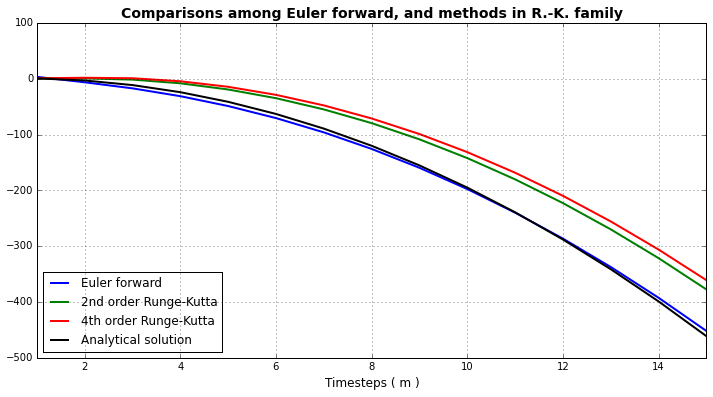

In [8]:
m = 15; t = range(1, m+1)
fig = plt.figure(figsize=(12, 6))
ax = fig.gca()
ax.plot(t, Euler_forward(delta_t, m, T0), linewidth=2, label='Euler forward')
ax.plot(t, RK2(delta_t, m, T0), linewidth=2, label='2nd order Runge-Kutta')
#ax.plot(t, RK3(delta_t, m, T0), linewidth=2, label='3rd order Runge-Kutta')
ax.plot(t, RK4(delta_t, m, T0), linewidth=2, label='4th order Runge-Kutta')
ax.plot(t, analytical_sln(delta_t, m, T0), color='k', linewidth=2, label='Analytical solution')
ax.legend(loc=3); ax.grid(); ax.set_xlim(1, m)
ax.set_xlabel('Timesteps ( m )', fontsize=12)
ax.set_title('Comparisons among Euler forward, and methods in R.-K. family', fontweight='bold', fontsize=14)

 We see that `Euler forward` do not perform well for their first step, but after the 2nd step, they do much better.